In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.tree import DecisionTreeClassifier

## Название фич

**survival** - выжившие 1 - да, 0 - нет 

**pclass** - Ticket class (класс билета) 1 = 1st, 2 = 2nd, 3 = 3rd

**sex** - пол 

**Age** - возраст

**sibsp** - братьев и сестер на борту 

**parch** - родителей / детей на борту

**ticket** - Ticket number	(номер билета)

**fare** - Passenger fare	(пассажирский тариф)

**cabin** - Cabin number (номер кабины)
 
**embarked** - Port of Embarkation (Порт погрузки)  C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
df_train = pd.read_csv("train.csv", index_col="PassengerId")

In [4]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [6]:
zero, one =  df_train["Survived"].value_counts()

In [7]:
round(one / (zero + one) * 100, 2) # процент выживших 

38.38

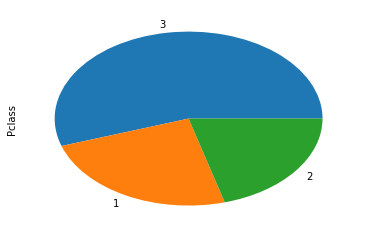

In [31]:
df_train["Pclass"].value_counts().plot.pie()

In [22]:
third, first, second = df_train["Pclass"].value_counts()

In [24]:
round(first / (first + second + third) * 100, 2) # процент пассажиров первого класса (24.24 ?)

24.24

In [34]:
round(df_train["Age"].mean(), 3) # среднее

29.699

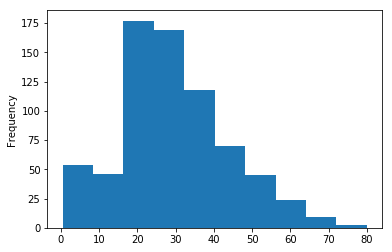

In [32]:
df_train["Age"].plot(kind="hist")

In [62]:
median = round(df_train["Age"].median(), 3) # медиана
print(median)

28.0


In [36]:
df_train.corr() # корреляция

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [26]:
def clean_name(name):
    # Первое слово до запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)

    # Если есть скобки - то имя пассажира в них
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)

    # Удаляем обращения
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)

    # Берем первое оставшееся слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')

    return name

In [41]:
names = df_train[df_train['Sex'] == 'female']['Name'].map(clean_name)
names.value_counts().head(5) # самое популярное женское имя 

Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
Name: Name, dtype: int64

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [30]:
df_train.shape

(891, 11)

In [68]:
new_df = df_train
new_df["Age"].fillna(0).head(15)
new_df.head(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [49]:
new_df[["Age", "Survived"]].head(5)
age_by_survived = new_df.groupby(["Age", "Survived"])
# age_by_survived.size()

## Задача

1) Оставьте в выборке четыре признака: класс пассажира (Pclass), цену билета (Fare), возраст пассажира (Age) и его пол (Sex).

2) Обратите внимание, что признак Sex имеет строковые значения.

3) Выделите целевую переменную — она записана в столбце Survived.

4) В данных есть пропущенные значения — например, для некоторых пассажиров неизвестен их возраст. Такие записи при чтении их в pandas принимают значение nan. Найдите все объекты, у которых есть пропущенные признаки, и удалите их из выборки.

5) Обучите решающее дерево с параметром random_state=241 и остальными параметрами по умолчанию (речь идет о параметрах конструктора DecisionTreeСlassifier).

6) Вычислите важности признаков и найдите два признака с наибольшей важностью. Их названия будут ответами для данной задачи (в качестве ответа укажите названия признаков через запятую или пробел, порядок не важен).

-

Создал новый дата фрейм с нужными фичами и заменил пол на 1 и 0 где male и female соответсвенно и заменили None на медиану

In [83]:
task_df = df_train[["Pclass", "Fare", "Age", "Sex"]]
task_df = task_df.replace(to_replace=['male', 'female'], value=[1, 0]) # replace - заменяет
task_df["Age"] = task_df["Age"].fillna(median) # заменили наны на медиану
target = df_train.Survived # целевая переменаня 

In [86]:
clf = DecisionTreeClassifier(random_state=241)
clf.fit(task_df, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=241,
            splitter='best')

In [91]:
importances = clf.feature_importances_
print(importances)

[0.12231561 0.32888831 0.23605599 0.31274009]


## Обозначеня атрибутов в DecisionTreeClassifier

**class_weight** - Estimate class weights for unbalanced datasets.(Оценка веса классов для несбалансированных наборов данных)

**criterion** - A decision tree classifier.(Классификатор дерева решений.)

**The maximum depth** - If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.(Максимальная глубина дерева. Если None, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше, чем min_samples_split.)

**max_features** - The number of features to consider when looking for the best split.(Количество функций, которые нужно учитывать при поиске лучшего раскола)

**max_leaf_nodes** - Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease** - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

**min_samples_leaf** - The minimum number of samples required to be at a leaf node.(
Минимальное количество образцов, которые должны быть у листового узла)

**min_samples_split** - The minimum number of samples required to split an internal node(
Минимальное количество выборок, необходимых для разделения внутреннего узла)

**min_weight_fraction_leaf** - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.(
Минимальная взвешенная доля суммарного веса (всех входных выборок) должна быть у листового узла. Образцы имеют одинаковый вес, когда sample_weight не предоставляется.)

**peresort** - Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.
